In [1]:
pip install yfinance tensorflow scikit-learn matplotlib pandas

/tmp/ipython-input-2-648993225.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


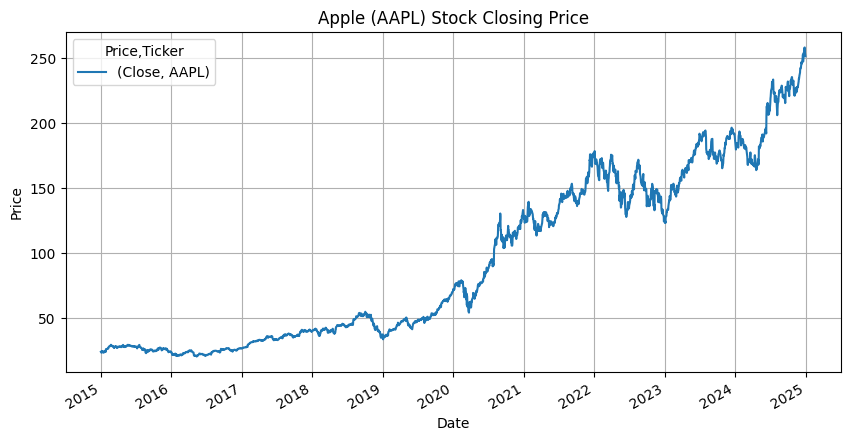

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - loss: 0.0230 - val_loss: 0.0022
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 9.5664e-04 - val_loss: 9.3477e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 8.9584e-04 - val_loss: 0.0042
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.6264e-04 - val_loss: 0.0035
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 8.9624e-04 - val_loss: 0.0027
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 8.8534e-04 - val_loss: 0.0023
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━

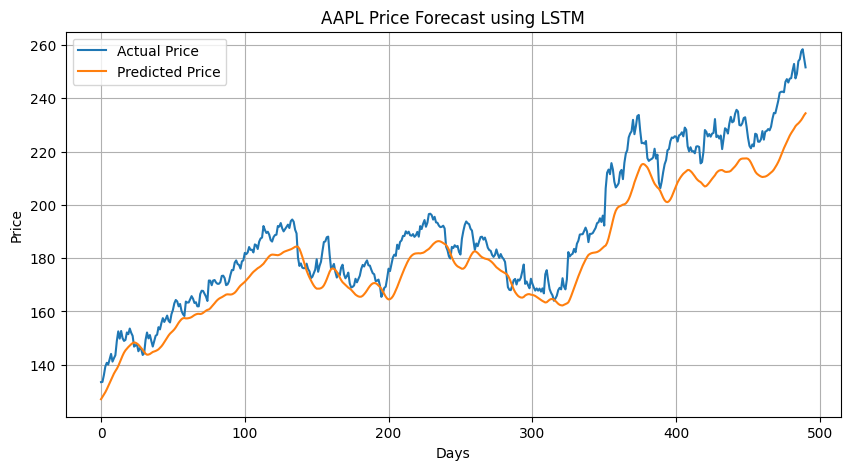

RMSE: 11.25
MAE: 9.53


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load AAPL stock price data
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
df = df[['Close']]  # Only use the closing price

# Plot the raw closing prices
df.plot(title='Apple (AAPL) Stock Closing Price', figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict and inverse scale
y_pred = model.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred_actual, label='Predicted Price')
plt.title('AAPL Price Forecast using LSTM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
